<a href="https://colab.research.google.com/github/Mateus-Brandao/Estudo/blob/main/Processamento_de_Linguagem_Natural_Parte_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:

dados = pd.read_csv('imdb-reviews-pt-br.csv')
dados.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


Dividindo os dados em treino e teste

In [ ]:
from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(dados['text_pt'], dados.sentiment, random_state = 42)

Aplicando a regressão logística

In [ ]:
from sklearn.linear_model import LogisticRegression

regressao_logistica = LogisticRegression()
regressao_logistica.fit(x_treino, y_treino)
acuracia = regressao_logistica.score(x_teste, y_teste)
print(acuracia)

ValueError: ignored

Nota-se que deu erro, pois o computador não consegue prever as strings, então é aqui que deve-se aplicar NLP para que o computador possar interpretar esses dados

In [ ]:
# exemplo de avaliação negativa

print('Negativa \n')
print(dados['text_pt'][102])

Negativa 

Uau, fiquei muito desapontado. Eu realmente não estava planejando ver esse filme no cinema, e gostaria de continuar com esse plano. Deve ser um filme feito para a tv. Eu estava meio animada em ver isso, já que sou uma grande fã de Fairuza Balk, mas esse filme não lhe fez justiça. Infact Estou um pouco decepcionado com a atuação ao redor. Que horrível encobrimento das tatuagens de Fairuza Balks, me incomodava toda vez que eu via seu ombro. Não havia fluxo para o filme, era muito difícil entrar nele. Uma cena nós ficamos bravos, exaltados, queremos sangue, a expectativa aumenta, então o diretor nos leva a outra cena para mostrar o amor entre Annie e Bobby. Teria sido mais agradável segui-lo se fosse dividido em três quadrinhos de papel em quadrinhos. Também havia pouca lógica por trás dos personagens escolhidos para interpretar algumas partes. Os líderes dos gângsteres eram caras magricelas, não muito críveis. Matt Dillon, chefe de uma organização de mafiosos? Vamos lá, me dê 

In [ ]:
# exemplo de avaliação positiva

print('Positiva \n')
print(dados['text_pt'][49001])

Positiva 

Quando Paris is Burning saiu, eu descartei totalmente isso. Eu não estava em todo o fenômeno da Madonna e da moda. Eu pensei que ia ser exagerado e bobo. Quão errado eu estava com esse filme. Eu assisti isso depois que o filme ficou fora por dez anos e eu corri para fora e comprei. Isso me levou de volta a um tempo e lugar de diversão e excitação. Eu senti como se conhecesse todos os personagens pessoalmente. Os anos 80 foram espetaculares e o filme capturou a essência da cultura gay. Que trabalho fantástico! Eu fui na internet e descobri o que alguns dos membros do elenco original estavam fazendo agora, mas eu não consegui localizar todos eles. Se alguém tiver alguma informação sobre algum dos membros do elenco, por favor me avise. Espero que eles façam outro documentário. EU AMEI


In [ ]:
dados.sentiment.value_counts()

neg    24765
pos    24694
Name: sentiment, dtype: int64

In [ ]:
classificacao = dados.sentiment.replace(['neg','pos'], [0,1])

In [ ]:
dados['classificacao'] = classificacao
dados.head()

,id,text_en,text_pt,sentiment,classificacao
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0


In [ ]:
dados.tail()

,id,text_en,text_pt,sentiment,classificacao
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos,1
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos,1
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos,1
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos,1
49458,49460,Working-class romantic drama from director Mar...,O drama romântico da classe trabalhadora do di...,pos,1


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

texto = ['Assisti um filme ótimo','Assisti um filme ruim']

vetorizar = CountVectorizer(lowercase = False)
bag_of_words = vetorizar.fit_transform(texto)
bag_of_words

<2x5 sparse matrix of type '<class 'numpy.int64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [ ]:
columns = vetorizar.get_feature_names_out()
columns

array(['Assisti', 'filme', 'ruim', 'um', 'ótimo'], dtype=object)

In [ ]:
matriz = pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns = columns)

In [ ]:
matriz

,Assisti,filme,ruim,um,ótimo
0,1,1,0,1,1
1,1,1,1,1,0


In [ ]:
vetorizar = CountVectorizer(lowercase = False, max_features = 50)
bag_of_words = vetorizar.fit_transform(dados.text_pt)

In [ ]:
bag_of_words.shape

(49459, 50)

In [ ]:
def classificar_texto(texto, coluna_texto, coluna_classificacao):
  vetorizar = CountVectorizer(lowercase = False, max_features = 50)
  bag_of_words = vetorizar.fit_transform(texto[coluna_texto])

  x_treino, x_teste, y_treino, y_teste = train_test_split(bag_of_words, texto[coluna_classificacao], random_state = 42)

  regressao_logistica = LogisticRegression()
  regressao_logistica.fit(x_treino, y_treino)
  return regressao_logistica.score(x_teste, y_teste) * 100

print(classificar_texto(dados,'text_pt', 'classificacao'))

65.83097452486858


In [ ]:
%matplotlib inline

from wordcloud import WordCloud

todas_palavras = ' '.join([texto for texto in dados['text_pt']])

nuvem_palavras = WordCloud(width =800, height=500, max_font_size=110, collocations = False).generate(todas_palavras)

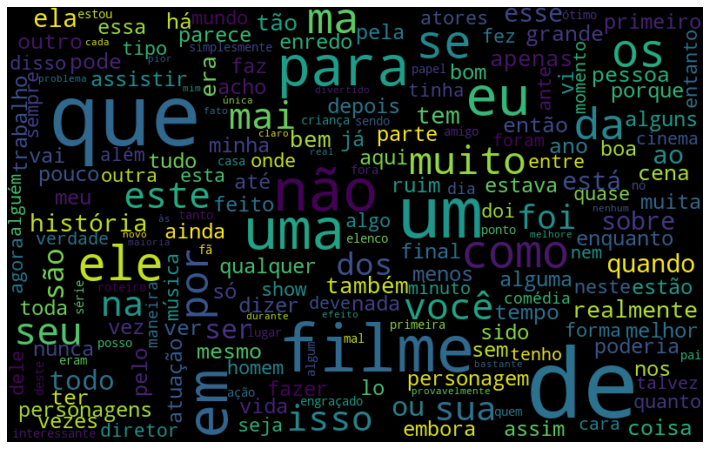

In [ ]:
import matplotlib.pyplot as plt 

plt.figure(figsize = (16,8))
plt.imshow(nuvem_palavras, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [ ]:
dados.query('sentiment == "pos"')

,id,text_en,text_pt,sentiment,classificacao
12389,12391,I went and saw this movie last night after bei...,Eu fui e vi este filme ontem à noite depois de...,pos,1
12390,12392,Actor turned director Bill Paxton follows up h...,"O diretor do ator, Bill Paxton, segue sua prom...",pos,1
12391,12393,As a recreational golfer with some knowledge o...,Como um jogador de recreio com algum conhecime...,pos,1
12392,12394,"I saw this film in a sneak preview, and it is ...","Eu vi esse filme em uma prévia, e é delicioso....",pos,1
12393,12395,Bill Paxton has taken the true story of the 19...,Bill Paxton levou a verdadeira história do gol...,pos,1
...,...,...,...,...,...
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos,1
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos,1
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos,1
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos,1


In [ ]:
def nuvem_palavras_neg(texto, coluna_texto):
  texto_negativo = texto.query('sentiment == "neg"')
  todas_palavras = ' '.join([texto for texto in texto_negativo[coluna_texto]])

  nuvem_palavras = WordCloud(width =800, height=500, max_font_size=110, collocations = False).generate(todas_palavras)

  import matplotlib.pyplot as plt 

  plt.figure(figsize = (16,8))
  plt.imshow(nuvem_palavras, interpolation = 'bilinear')
  plt.axis('off')
  plt.show()

In [ ]:
def nuvem_palavras_pos(texto, coluna_texto):
  texto_positivo = texto.query('sentiment == "pos"')
  todas_palavras = ' '.join([texto for texto in texto_positivo[coluna_texto]])

  nuvem_palavras = WordCloud(width =800, height=500, max_font_size=110, collocations = False).generate(todas_palavras)

  import matplotlib.pyplot as plt 

  plt.figure(figsize = (16,8))
  plt.imshow(nuvem_palavras, interpolation = 'bilinear')
  plt.axis('off')
  plt.show()

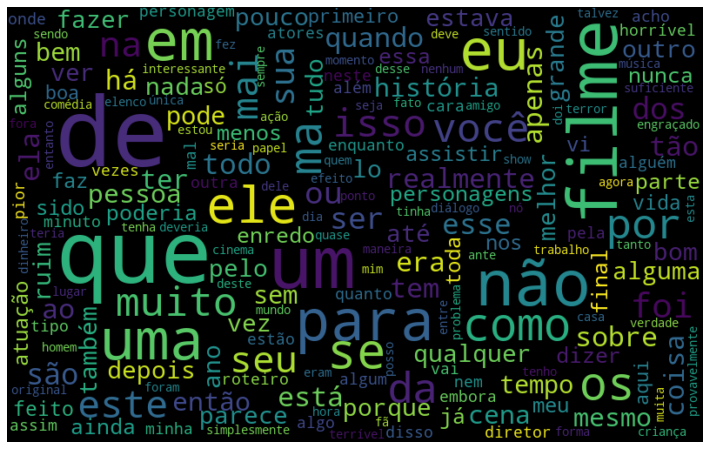

In [ ]:
nuvem_palavras_neg(dados, 'text_pt')

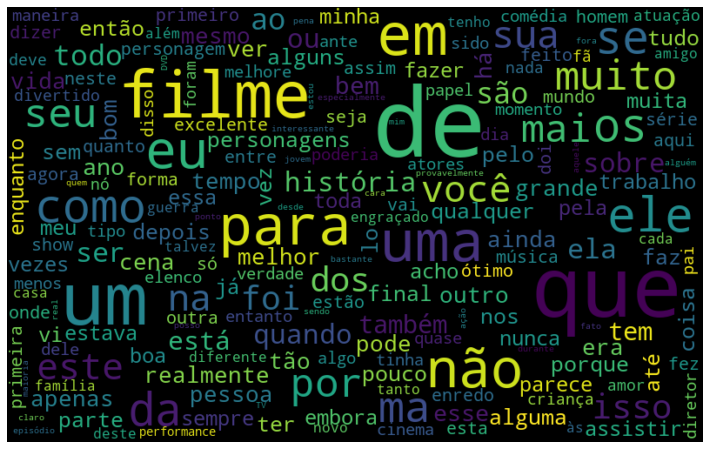

In [ ]:
nuvem_palavras_pos(dados, 'text_pt')

In [ ]:
import nltk 
nltk.download('all')

a = ['um filme ruim','um filme bom']
frequencia = nltk.FreqDist(a)
frequencia

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

FreqDist({'um filme bom': 1, 'um filme ruim': 1})

In [ ]:
from nltk import tokenize

frase = 'Bem vindo ao mundo do PLN'

token_espaco = tokenize.WhitespaceTokenizer()
token_frase = token_espaco.tokenize(frase)
token_frase

['Bem', 'vindo', 'ao', 'mundo', 'do', 'PLN']

In [ ]:
token_frase = token_espaco.tokenize(todas_palavras)
frequencia = nltk.FreqDist(token_frase)

df_frequencia = pd.DataFrame({'Palavra': list(frequencia.keys()), 'Frequencia':list(frequencia.values())})

In [ ]:
top_10 = df_frequencia.nlargest(columns = 'Frequencia', n = 10)
top_10

,Palavra,Frequencia
20,de,417651
14,que,325070
42,e,299743
3,o,244881
7,um,216410
102,a,210179
45,é,192381
200,em,132778
1,uma,130888
29,não,127915


In [ ]:
import seaborn as sns

def pareto(texto, coluna_texto, quantidade):
  todas_palavras = ' '.join([texto for texto in texto[coluna_texto]])
  token_frase = token_espaco.tokenize(todas_palavras)
  frequencia = nltk.FreqDist(token_frase)
  df_frequencia = pd.DataFrame({'Palavra': list(frequencia.keys()), 'Frequencia':list(frequencia.values())})
  df_frequencia = df_frequencia.nlargest(columns = 'Frequencia', n = quantidade)

  plt.figure(figsize= (16,8))

  ax = sns.barplot(data = df_frequencia, x = 'Palavra', y = 'Frequencia', color = 'gray')
  ax.set(ylabel = 'Contagem')
  plt.show()

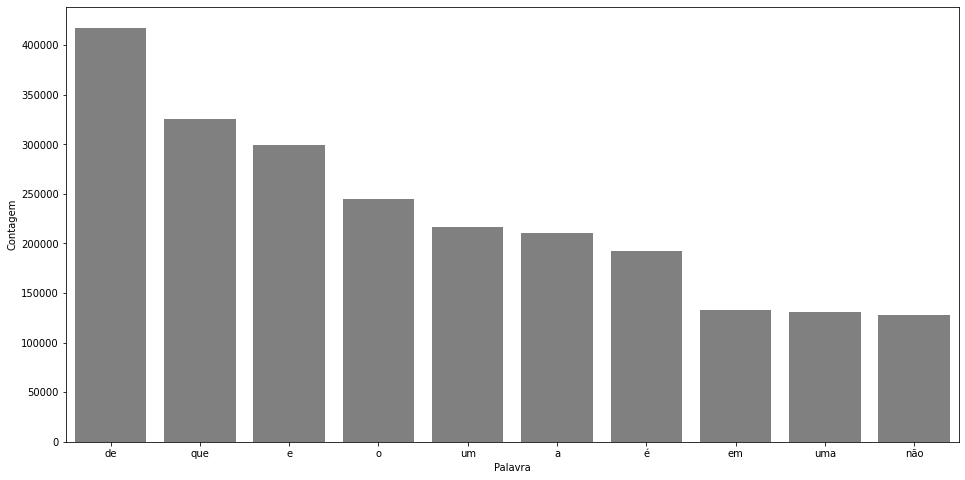

In [ ]:
pareto(dados, 'text_pt', 10)

In [ ]:
from nltk.corpus import stopwords

palavras_irrelevantes = nltk.corpus.stopwords.words('portuguese')
print(palavras_irrelevantes)

['de', 'a', 'o', 'que', 'e', 'é', 'do', 'da', 'em', 'um', 'para', 'com', 'não', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'ao', 'ele', 'das', 'à', 'seu', 'sua', 'ou', 'quando', 'muito', 'nos', 'já', 'eu', 'também', 'só', 'pelo', 'pela', 'até', 'isso', 'ela', 'entre', 'depois', 'sem', 'mesmo', 'aos', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'você', 'essa', 'num', 'nem', 'suas', 'meu', 'às', 'minha', 'numa', 'pelos', 'elas', 'qual', 'nós', 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 'dele', 'tu', 'te', 'vocês', 'vos', 'lhes', 'meus', 'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela', 'delas', 'esta', 'estes', 'estas', 'aquele', 'aquela', 'aqueles', 'aquelas', 'isto', 'aquilo', 'estou', 'está', 'estamos', 'estão', 'estive', 'esteve', 'estivemos', 'estiveram', 'estava', 'estávamos', 'estavam', 'estivera', 'estivéramos', 'esteja', 'estejamos', 'estejam', 'estivesse', 'estivéssemos', 'estivessem', 'estiver', 'estiv

In [ ]:
frase_processada = list()

for opiniao in dados.text_pt:
  nova_frase = list()
  palavras_texto = token_espaco.tokenize(opiniao)
  for palavra in palavras_texto:
    if palavra not in palavras_irrelevantes:
      nova_frase.append(palavra)
  frase_processada.append(' '.join(nova_frase))

dados['tratamento_1'] = frase_processada

In [ ]:
dados.head()

,id,text_en,text_pt,sentiment,classificacao,tratamento_1
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece..."
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi..."
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve..."


In [ ]:
classificar_texto(dados, 'tratamento_1', 'classificacao')

66.07359482410028

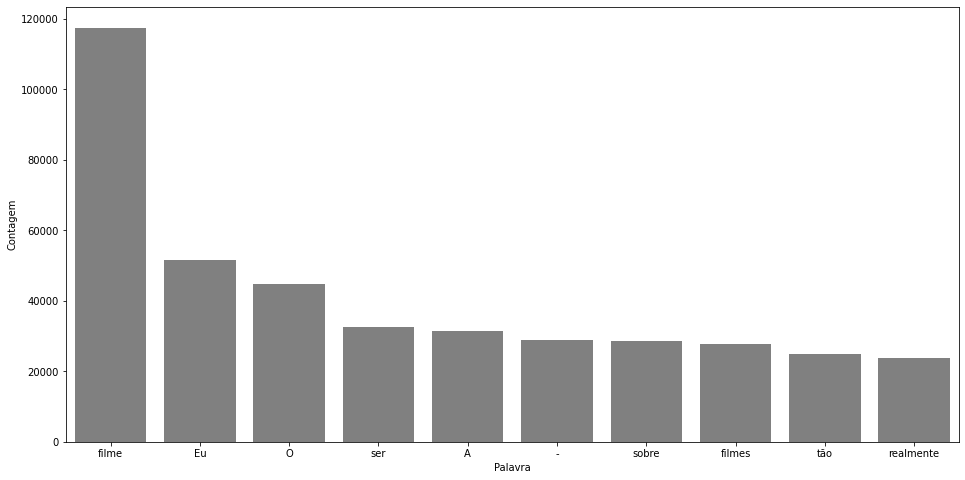

In [ ]:
pareto(dados,'tratamento_1',10)

In [ ]:
from nltk import tokenize

frase = 'Olá mundo!'
token_pontuacao = tokenize.WordPunctTokenizer()
token_frase = token_pontuacao.tokenize(frase)

print(token_frase)

['Olá', 'mundo', '!']


In [ ]:
from string import punctuation

pontuacao = list()
for ponto in punctuation:
  pontuacao.append(ponto)
  
pontuacao_stopwords = pontuacao + palavras_irrelevantes

frase_processada = list()
for opiniao in dados['tratamento_1']:
  nova_frase = list()
  palavras_texto = token_pontuacao.tokenize(opiniao)
  for palavra in palavras_texto:
    if palavra not in pontuacao_stopwords:
      nova_frase.append(palavra)
  frase_processada.append(' '.join(nova_frase))

dados['tratamento_2'] = frase_processada

In [ ]:
dados['tratamento_2'][0]

'Mais vez Sr Costner arrumou filme tempo necessário Além terríveis seqüências resgate mar quais poucas simplesmente importei nenhum personagens A maioria fantasmas armário personagem Costers realizado logo início esquecido tarde importava O personagem deveríamos importar arrogante superconfiante Ashton Kutcher O problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armário desordenado Seu único obstáculo parece estar vencendo Costner Finalmente bem além meio caminho Costner conta sobre fantasmas Kutchers Somos informados Kutcher levado ser melhor pressentimentos presságios anteriores Nenhuma mágica aqui tudo podia fazer desligar hora'

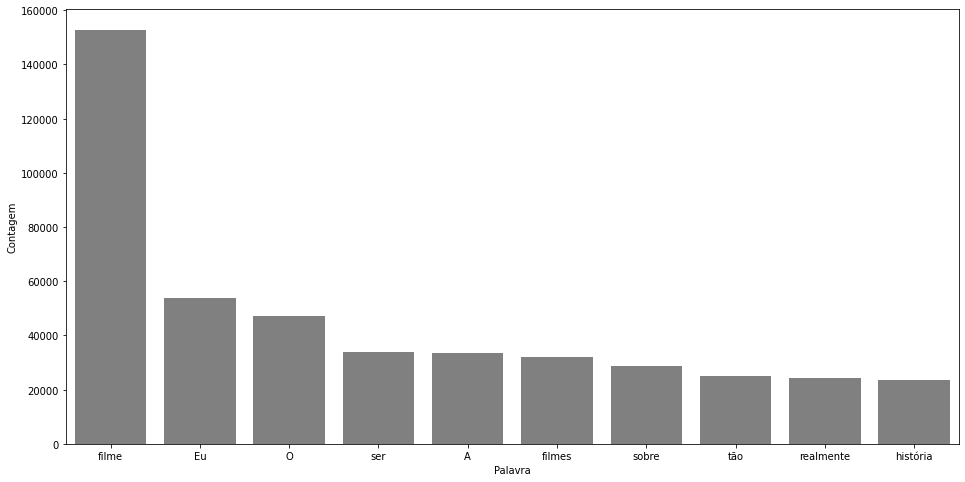

In [ ]:
pareto(dados,'tratamento_2', 10)

In [ ]:
pip install unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 235 kB 15.9 MB/s 


In [ ]:
import unidecode

acentos = 'ótimo péssimo não é tão vô'

teste = unidecode.unidecode(acentos)
print (teste)

otimo pessimo nao e tao vo


In [ ]:
sem_acentos = [unidecode.unidecode(texto) for texto in dados['tratamento_2']]

In [ ]:
sem_acentos[0]

'Mais vez Sr Costner arrumou filme tempo necessario Alem terriveis sequencias resgate mar quais poucas simplesmente importei nenhum personagens A maioria fantasmas armario personagem Costers realizado logo inicio esquecido tarde importava O personagem deveriamos importar arrogante superconfiante Ashton Kutcher O problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armario desordenado Seu unico obstaculo parece estar vencendo Costner Finalmente bem alem meio caminho Costner conta sobre fantasmas Kutchers Somos informados Kutcher levado ser melhor pressentimentos pressagios anteriores Nenhuma magica aqui tudo podia fazer desligar hora'

In [ ]:
stopwords = [unidecode.unidecode(texto) for texto in pontuacao_stopwords]

In [ ]:
stopwords

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~',
 'de',
 'a',
 'o',
 'que',
 'e',
 'e',
 'do',
 'da',
 'em',
 'um',
 'para',
 'com',
 'nao',
 'uma',
 'os',
 'no',
 'se',
 'na',
 'por',
 'mais',
 'as',
 'dos',
 'como',
 'mas',
 'ao',
 'ele',
 'das',
 'a',
 'seu',
 'sua',
 'ou',
 'quando',
 'muito',
 'nos',
 'ja',
 'eu',
 'tambem',
 'so',
 'pelo',
 'pela',
 'ate',
 'isso',
 'ela',
 'entre',
 'depois',
 'sem',
 'mesmo',
 'aos',
 'seus',
 'quem',
 'nas',
 'me',
 'esse',
 'eles',
 'voce',
 'essa',
 'num',
 'nem',
 'suas',
 'meu',
 'as',
 'minha',
 'numa',
 'pelos',
 'elas',
 'qual',
 'nos',
 'lhe',
 'deles',
 'essas',
 'esses',
 'pelas',
 'este',
 'dele',
 'tu',
 'te',
 'voces',
 'vos',
 'lhes',
 'meus',
 'minhas',
 'teu',
 'tua',
 'teus',
 'tuas',
 'nosso',
 'nossa',
 'nossos',
 'nossas',
 'dela',
 'delas',
 'esta',
 'estes',
 'estas',
 'aquele',
 

In [ ]:
dados['tratamento_3'] = sem_acentos

frase_processada = list()
for opiniao in dados['tratamento_3']:
  nova_frase = list()
  palavras_texto = token_pontuacao.tokenize(opiniao)
  for palavra in palavras_texto:
    if palavra not in pontuacao_stopwords:
      nova_frase.append(palavra)
  frase_processada.append(' '.join(nova_frase))

dados['tratamento_3'] = frase_processada

In [ ]:
dados.head()

,id,text_en,text_pt,sentiment,classificacao,tratamento_1,tratamento_2,tratamento_3
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece...",Mais vez Sr Costner arrumou filme tempo necess...,Mais vez Sr Costner arrumou filme tempo necess...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes acao mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi...",Primeiro tudo odeio raps imbecis poderiam agir...,Primeiro tudo odeio raps imbecis poderiam agir...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever musicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve...",Filmes fotos latão palavra apropriada verdade ...,Filmes fotos latao palavra apropriada verdade ...


In [ ]:
acuracia_tratamento_3 = classificar_texto(dados,'tratamento_3','classificacao')
print(acuracia_tratamento_3)

68.10351799433886


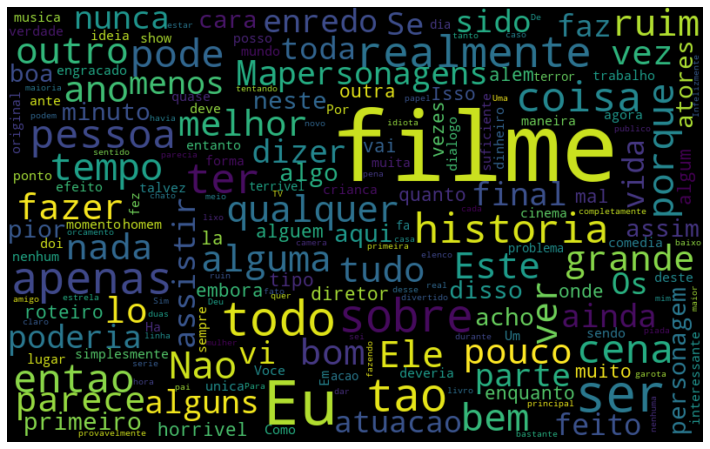

In [ ]:
nuvem_palavras_neg(dados,'tratamento_3')

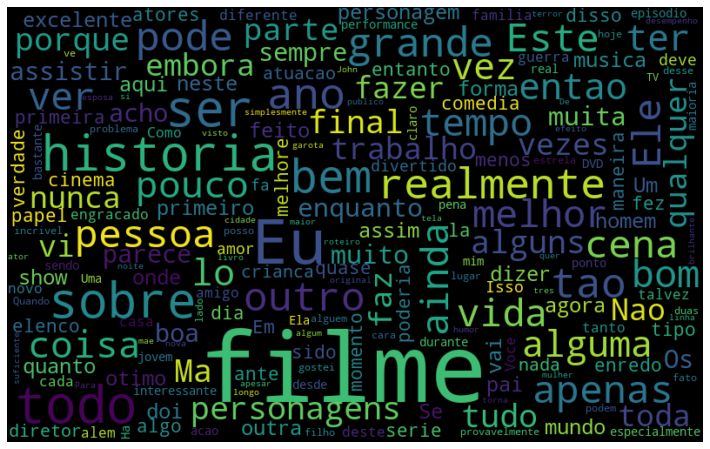

In [ ]:
nuvem_palavras_pos(dados,'tratamento_3')

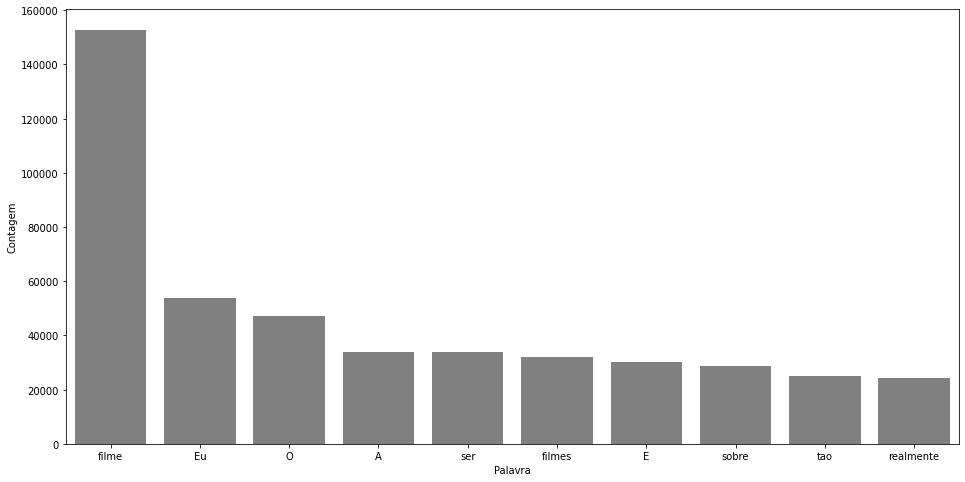

In [ ]:
pareto(dados,'tratamento_3', 10)

In [ ]:
frase = 'O Thiago É O Novo Instrutor Da Alura'

print(frase.lower())

o thiago é o novo instrutor da alura


In [ ]:
frase_processada = list()
for opiniao in dados['tratamento_3']:
  nova_frase = list()
  opiniao = opiniao.lower()
  palavras_texto = token_pontuacao.tokenize(opiniao)
  for palavra in palavras_texto:
    if palavra not in stopwords:
      nova_frase.append(palavra)
  frase_processada.append(' '.join(nova_frase))

dados['tratamento_4'] = frase_processada

In [ ]:
dados['tratamento_4'][0]

'vez sr costner arrumou filme tempo necessario alem terriveis sequencias resgate mar quais poucas simplesmente importei nenhum personagens maioria fantasmas armario personagem costers realizado logo inicio esquecido tarde importava personagem deveriamos importar arrogante superconfiante ashton kutcher problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armario desordenado unico obstaculo parece estar vencendo costner finalmente bem alem meio caminho costner conta sobre fantasmas kutchers informados kutcher levado ser melhor pressentimentos pressagios anteriores nenhuma magica aqui tudo podia fazer desligar hora'

In [ ]:
acuracia_tratamento_4 = classificar_texto(dados,'tratamento_4','classificacao')
print(acuracia_tratamento_4)

68.79094217549535


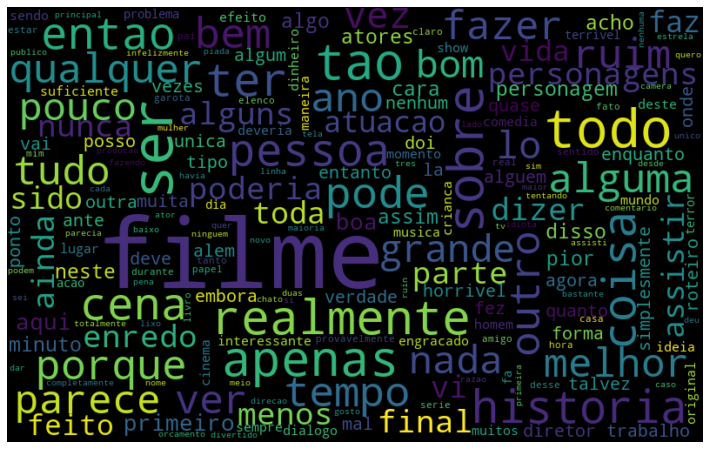

In [ ]:
nuvem_palavras_neg(dados,'tratamento_4')

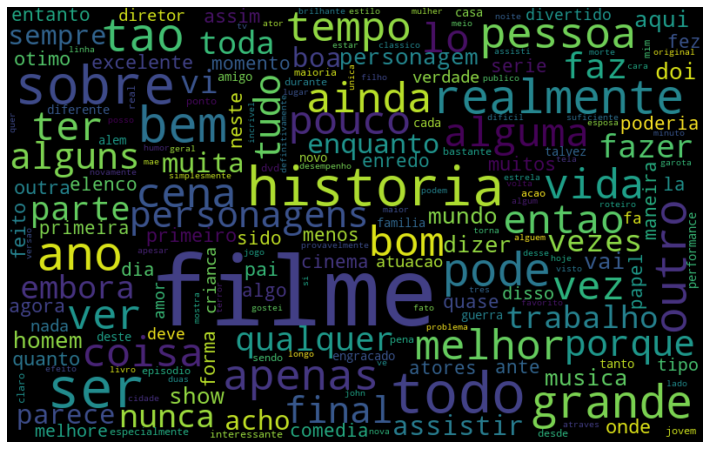

In [ ]:
nuvem_palavras_pos(dados,'tratamento_4')

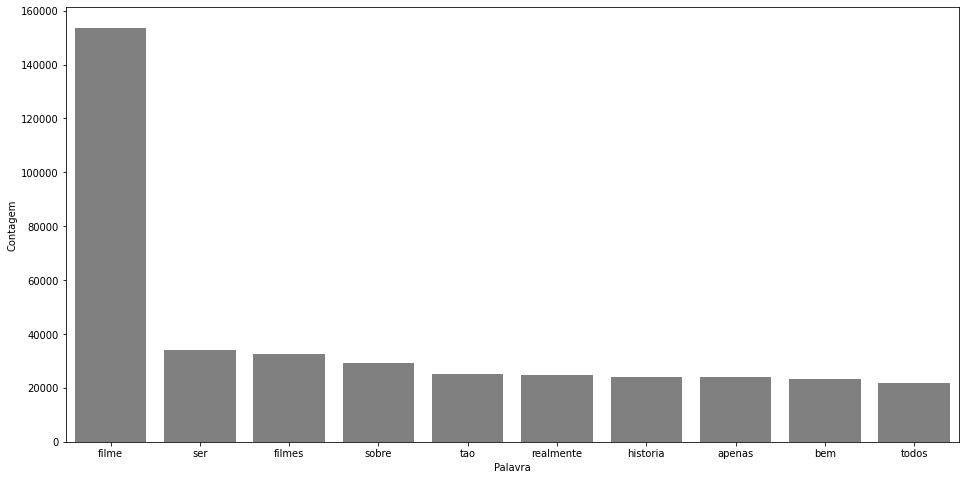

In [ ]:
pareto(dados,'tratamento_4', 10)

In [ ]:
stemmer = nltk.RSLPStemmer()
stemmer.stem('corredor')

'corr'

In [ ]:
frase_processada = list()
for opiniao in dados['tratamento_4']:
  nova_frase = list()
  palavras_texto = token_pontuacao.tokenize(opiniao)
  for palavra in palavras_texto:
    if palavra not in stopwords:
      nova_frase.append(stemmer.stem(palavra))
  frase_processada.append(' '.join(nova_frase))

dados['tratamento_5'] = frase_processada

In [ ]:
acuracia_tratamento_5 = classificar_texto(dados,'tratamento_5','classificacao')
print(acuracia_tratamento_5)

69.43792964011323


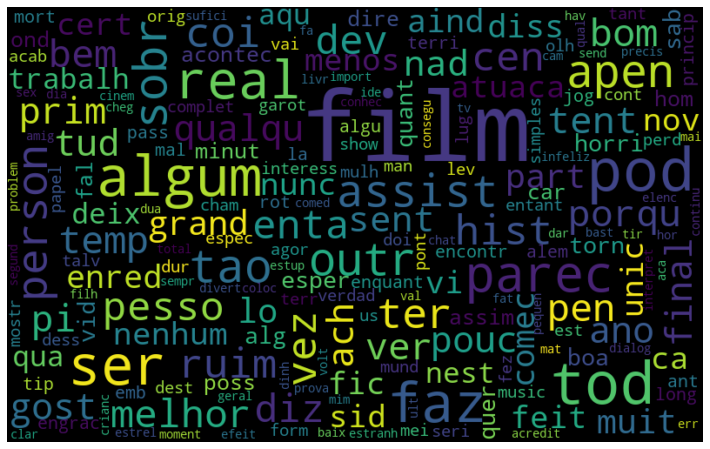

In [ ]:
nuvem_palavras_neg(dados,'tratamento_5')

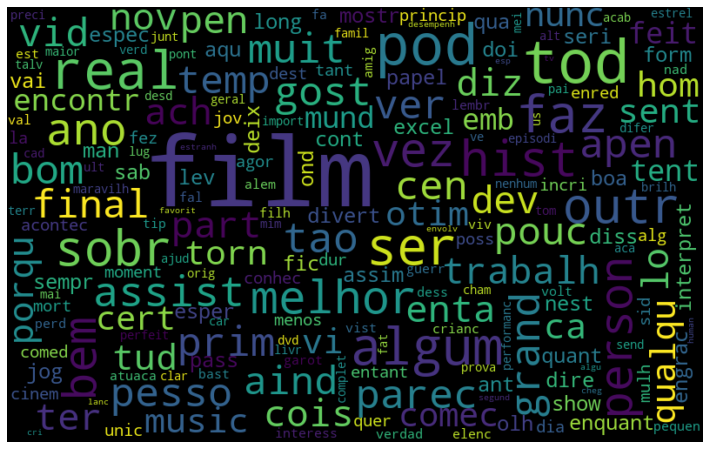

In [ ]:
nuvem_palavras_pos(dados,'tratamento_5')

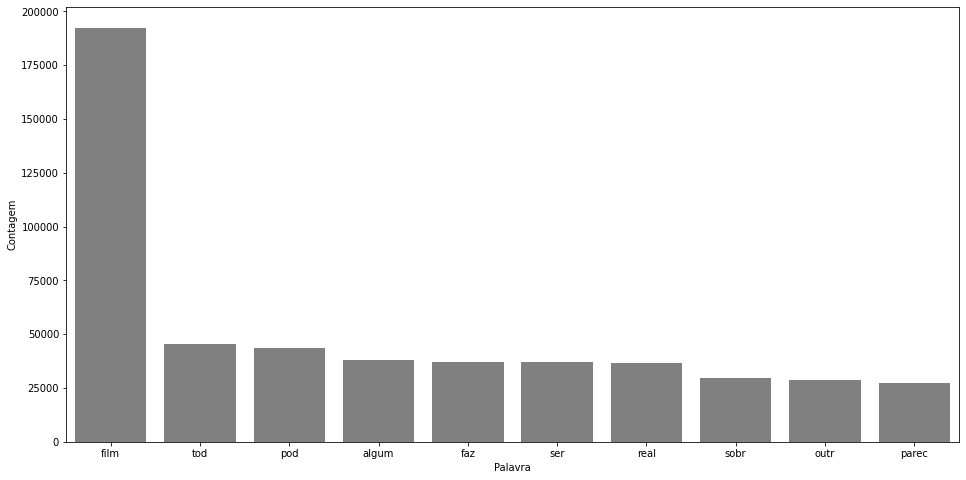

In [ ]:
pareto(dados,'tratamento_5', 10)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

frases = ['Assisti um filme ótimo', 'Assisti um filme péssimo']

tfidf = TfidfVectorizer(lowercase = False, max_features = 50)

caracteristicas = tfidf.fit_transform(frases)

pd.DataFrame(caracteristicas.todense(), columns = tfidf.get_feature_names_out())

,Assisti,filme,péssimo,um,ótimo
0,0.448321,0.448321,0.000000,0.448321,0.630099
1,0.448321,0.448321,0.630099,0.448321,0.000000


In [ ]:
tfidf_bruto = tfidf.fit_transform(dados['text_pt'])

treino_x, teste_x, treino_y, teste_y = train_test_split(tfidf_bruto, dados['classificacao'], random_state = 42)

regressao_logistica.fit(treino_x, treino_y)
acuracia_tfidf_bruto = regressao_logistica.score(teste_x, teste_y)
print(acuracia_tfidf_bruto)

0.6600889607763849


In [ ]:
tfidf_tratado = tfidf.fit_transform(dados['tratamento_5'])

treino_x, teste_x, treino_y, teste_y = train_test_split(tfidf_tratado, dados['classificacao'], random_state = 42)

regressao_logistica.fit(treino_x, treino_y)
acuracia_tfidf_tratado = regressao_logistica.score(teste_x, teste_y)
print(acuracia_tfidf_tratado)

0.6988273352203801


In [ ]:
from nltk import ngrams

frase = 'Assisti um ótimo filme.'
frase_separada = token_espaco.tokenize(frase)
pares = ngrams(frase_separada, 2)
list(pares)


[('Assisti', 'um'), ('um', 'ótimo'), ('ótimo', 'filme.')]

In [ ]:
tfidf = TfidfVectorizer(lowercase = False, ngram_range = (1,2))
vetor_tfidf = tfidf.fit_transform(dados['tratamento_5'])

treino_x, teste_x, treino_y, teste_y = train_test_split(vetor_tfidf, dados['classificacao'], random_state = 42)
regressao_logistica.fit(treino_x, treino_y)
acuracia_tfidf_ngrams = regressao_logistica.score(teste_x, teste_y)
print(acuracia_tfidf_ngrams)

0.8858875859280226


In [ ]:
tfidf = TfidfVectorizer(lowercase = False)
vetor_tfidf = tfidf.fit_transform(dados['tratamento_5'])

treino_x, teste_x, treino_y, teste_y = train_test_split(vetor_tfidf, dados['classificacao'], random_state = 42)
regressao_logistica.fit(treino_x, treino_y)
acuracia_tfidf = regressao_logistica.score(teste_x, teste_y)
print(acuracia_tfidf)

0.8841892438334007


In [ ]:
'''
UTILIZANDO O MAX FEATURES O RESULTADO ABAIXOU PRA 69,88%

tfidf = TfidfVectorizer(lowercase = False, max_features=50)
vetor_tfidf = tfidf.fit_transform(dados['tratamento_5'])

treino_x, teste_x, treino_y, teste_y = train_test_split(vetor_tfidf, dados['classificacao'], random_state = 42)
regressao_logistica.fit(treino_x, treino_y)
acuracia_tfidf = regressao_logistica.score(teste_x, teste_y)
print(acuracia_tfidf)
'''

0.6988273352203801


In [ ]:
pesos = pd.DataFrame(regressao_logistica.coef_[0].T, index = tfidf.get_feature_names_out())

# as 10 melhores palavras

pesos.nlargest(10,0)

,0
otim,8.290477
excel,7.978023
perfeit,6.578863
favorit,5.778018
maravilh,5.286500
incri,5.049495
hilari,4.653807
divert,4.579574
ador,4.422221
brilh,4.268573


In [ ]:
# as 10 piores palavras

pesos.nsmallest(10,0)

,0
pi,-9.175704
ruim,-9.169727
horri,-8.751674
terri,-7.186909
chat,-6.919291
nad,-6.029855
infeliz,-5.310519
decepca,-4.995830
ridicul,-4.950824
nenhum,-4.918832
